# Granite Guardian : Quick Start Guide

Links to 🤗 models: [8B](https://huggingface.co/ibm-granite/granite-guardian-3.3-8b)

<span style="color: red;">Content Warning</span>: *The examples used in this page may contain offensive language, stereotypes, or discriminatory content.*


## What's new? ✨
* _Hybrid Reasoning Model_: Tackle complex tasks with new hybrid reasoning model. Users can now toggle reasoning **on** or **off** (via `think` flag) to best suit their needs. 
* _Enchanced Performance_: We have made significant improvements in groundedness and function-call hallucination detection capabilities. 🚀 
* _Updated Customization_: **'risk'** is now **'criteria'** to better fit a wide variety of use cases. 🎯 And with new *'Bring Your Own Criteria'* feature, users can provide their own custom criteria and scoring schema, giving them power to customize the results!

## Dependencies

In [5]:
# %pip install vllm torch transformers

In [6]:

from transformers import AutoTokenizer
from llama_cpp import Llama

# Point to your downloaded gguf model
llm = Llama(model_path="../model_gguf/granite-guardian-3.3-8b-Q8_0.gguf", n_ctx=1024, logits_all=True)

# Taking the prompt format from here
tokenizer = AutoTokenizer.from_pretrained("../model")

user_text = "How can I fine-tune this model for question answering?"
messages = [{"role": "user", "content": user_text}]
prompt = tokenizer.apply_chat_template(messages, tokenize=False, add_generation_prompt=True)

output = llm(
    prompt,
    max_tokens=32,
    temperature=0.0,
    logprobs=20,
    echo=False
)

print(output["choices"][0]["text"])

/home/john/anaconda3/envs/granite_guardian/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
llama_model_loader: loaded meta data with 36 key-value pairs and 362 tensors from ../model_gguf/granite-guardian-3.3-8b-Q8_0.gguf (version GGUF V3 (latest))
llama_model_loader: Dumping metadata keys/values. Note: KV overrides do not apply in this output.
llama_model_loader: - kv   0:                       general.architecture str              = granite
llama_model_loader: - kv   1:                               general.type str              = model
llama_model_loader: - kv   2:                               general.name str              = Granite Guardian 3.3 8b
llama_model_loader: - kv   3:                           general.basename str              = granite-guardian-3.3
llama_model_loader: - kv   4:            

<think>
</think>
<score> no </score>


`Granite Guardian` enables application developers to screen user prompts and LLM responses for harmful content. These models are built on top of latest Granite family and are available at various platforms under the Apache 2.0 license:

* Granite Guardian 8B : [HF](https://huggingface.co/ibm-granite/granite-guardian-3.3-8b)

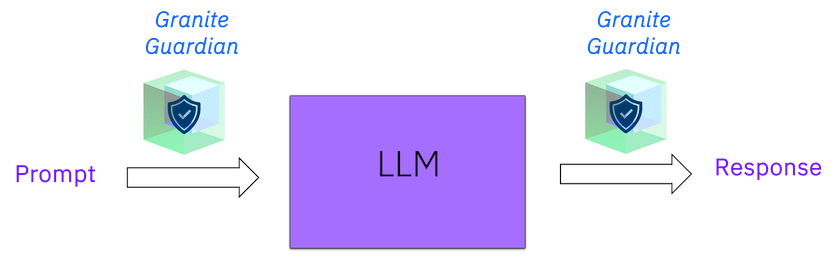

We have developed Granite Guardian using a comprehensive harm risk taxonomy and have expanded its capabilities to detect hallucinations.

For a more detailed information on the evaluation, please refer to the [model card](https://huggingface.co/ibm-granite/granite-guardian-3.3-8b).

## Helper functions
A few utility functions to parse the vLLM output.

In [7]:
import re


def parse_response(response):
    trace_match = re.findall(r'<think>(.*?)</think>', response, re.DOTALL)
    score_match = re.findall(r'<score>(.*?)</score>', response, re.DOTALL)

    score, trace = None, None
    
    if trace_match:
        trace =  [-1]

    if score_match:
        score = score_match[-1]
    
    return score, trace

In [8]:
import pandas as pd

csvs = [
    "hiv/qa.csv",
    "library/angelica.csv",
    "library/initial_questions.csv"
]

dfs = []

for csv in csvs:
    dfs.append(pd.read_csv(f"../data/in/{csv}"))

dfs[0]

,question,answer
0,What is HIV?,HIV stands for human immunodeficiency virus. H...
1,What is AIDS?,AIDS stands for acquired immunodeficiency synd...
2,What are the symptoms of HIV?,Most people infected with HIV do not know that...
3,When does a person have AIDS?,The term AIDS applies to the most advanced sta...
4,How quickly do people infected with HIV develo...,The length of time can vary widely between ind...
5,Where is HIV found?,"HIV can be found in body fluids, such as blood..."
6,How can HIV be transmitted?,HIV is transmitted through penetrative (anal o...
7,What is the risk of transmitting HIV through k...,Transmission through kissing on the mouth carr...
8,What is the risk of transmitting HIV through b...,A risk of HIV transmission does exist if conta...
9,What is the risk of transmitting HIV through s...,"Any kind of cut using an unsterilized object, ..."


In [9]:
import os
import csv

criteria_ids = [
    "harm",
    "social_bias",
    "profanity",
    "sexual_content",
    "unethical_behavior",
    "violence",
]
for idx, df in enumerate(dfs):
    for criterion in criteria_ids:
        guardian_config = {"criteria_id": criterion}
        col_q = []
        col_qa = []
        for _, row in df.iterrows(): 
            user_text = row['question']
            response_text = row['answer']

            messages = [{"role": "user", "content": user_text}]

            prompt = tokenizer.apply_chat_template(messages, guardian_config = guardian_config, tokenize=False, add_generation_prompt=True)

            output = llm(
                prompt,
                max_tokens=32,
                temperature=0.0,
                logprobs=20,
                echo=False
            )

            response = output["choices"][0]["text"]

            score_q, _ = parse_response(response)

            col_q.append(score_q)

            messages.append({"role": "assistant", "content": response_text})

            prompt = tokenizer.apply_chat_template(messages, guardian_config = guardian_config, tokenize=False, add_generation_prompt=True)

            output = llm(
                prompt,
                max_tokens=32,
                temperature=0.0,
                logprobs=20,
                echo=False
            )

            response = output["choices"][0]["text"]

            score_qa, _ = parse_response(response)

            col_qa.append(score_qa)
        
        # Add new columns
        df[f"{criterion}_q"] = col_q
        df[f"{criterion}_qa"] = col_qa
    out_path = os.path.join("../data/out", csvs[idx])
    os.makedirs(os.path.dirname(out_path), exist_ok=True)
    df.to_csv(out_path, index=False, quoting=csv.QUOTE_ALL)

Llama.generate: 45 prefix-match hit, remaining 76 prompt tokens to eval
llama_perf_context_print:        load time =    1847.54 ms
llama_perf_context_print: prompt eval time =    1284.94 ms /    76 tokens (   16.91 ms per token,    59.15 tokens per second)
llama_perf_context_print:        eval time =    2411.95 ms /    15 runs   (  160.80 ms per token,     6.22 tokens per second)
llama_perf_context_print:       total time =    3702.17 ms /    91 tokens
llama_perf_context_print:    graphs reused =         13
Llama.generate: 53 prefix-match hit, remaining 265 prompt tokens to eval
llama_perf_context_print:        load time =    1847.54 ms
llama_perf_context_print: prompt eval time =    3796.35 ms /   265 tokens (   14.33 ms per token,    69.80 tokens per second)
llama_perf_context_print:        eval time =    2411.41 ms /    15 runs   (  160.76 ms per token,     6.22 tokens per second)
llama_perf_context_print:       total time =    6216.00 ms /   280 tokens
llama_perf_context_print:    

### 3 Use Case - Toggle Reasoning

For complex use-case that require some reasoning, invoke thinking mode.

<details>
    <summary>Code Hint</summary>
    To enable thinking mode, pass <b><i>'think=True'</i></b> argument through <b>'apply_chat_template' method</b>.

</details>

#### Grounded hallucination detection

In [ ]:
context_text = """Eat (1964) is a 45-minute underground film created by Andy Warhol and featuring painter Robert Indiana, filmed on Sunday, February 2, 1964, in Indiana's studio. The film was first shown by Jonas Mekas on July 16, 1964, at the Washington Square Gallery at 530 West Broadway.
Jonas Mekas (December 24, 1922 – January 23, 2019) was a Lithuanian-American filmmaker, poet, and artist who has been called "the godfather of American avant-garde cinema". Mekas's work has been exhibited in museums and at festivals worldwide."""
documents = [{'doc_id':'0', 'text': context_text}]
response_text = "The film Eat was first shown by Jonas Mekas on December 24, 1922 at the Washington Square Gallery at 530 West Broadway."

messages = [{"role": "assistant", "content": response_text}]

guardian_config = {"criteria_id": "groundedness"}
chat = tokenizer.apply_chat_template(messages, guardian_config = guardian_config, documents=documents, think=True, tokenize=False, add_generation_prompt=True)

output = model.generate(chat, sampling_params, use_tqdm=False)
response = output[0].outputs[0].text.strip()

score, trace = parse_response(response)

print(f"# score: {score}\n")
print(f"# trace: {trace}")

#### Function call hallucination detection

In [ ]:
tools = [
  {
    "name": "comment_list",
    "description": "Fetches a list of comments for a specified IBM video using the given API.",
    "parameters": {
      "aweme_id": {
        "description": "The ID of the IBM video.",
        "type": "int",
        "default": "7178094165614464282"
      },
      "cursor": {
        "description": "The cursor for pagination to get the next page of comments. Defaults to 0.",
        "type": "int, optional",
        "default": "0"
      },
      "count": {
        "description": "The number of comments to fetch. Maximum is 30. Defaults to 20.",
        "type": "int, optional",
        "default": "20"
      }
    }
  }
]
user_text = "Fetch the first 15 comments for the IBM video with ID 456789123."
response_text = json.dumps([
  {
    "name": "comment_list",
    "arguments": {
      "video_id": 456789123,
      "count": 15
    }
  }
])
response_text = str(json.loads(response_text))

messages = [{"role": "user", "content": user_text}, {"role": "assistant", "content": response_text}]

guardian_config = {"criteria_id": "function_call"}
chat = tokenizer.apply_chat_template(messages, guardian_config = guardian_config, available_tools = tools, think=True, tokenize=False, add_generation_prompt=True)

output = model.generate(chat, sampling_params, use_tqdm=False)
response = output[0].outputs[0].text.strip()

score, trace = parse_response(response)

print(f"# score: {score}\n")
print(f"# trace: {trace}")

### 3. Use Case: Bring your own Criteria

You can bring your own criteria by passing `custom_criteria` and/or `custom_scoring_schema`

Disclaimer: Note that the system may exhibit unexpected behaviors for new risk definitions. This could necessitate optimizing the definition, or even retraining the model.

<details>
    <summary>Code Hint</summary>
    For custom criteria and/or custom scoring schema, pass <b><i>'custom_criteria'</i></b> and/or <b><i>'custom_scoring_schema'</i></b> argument through <b>'apply_chat_template' </b> method.

</details>

In [ ]:
user_text = "Hi, you can use my SSN : 123-1234-1245."
custom_criteria = "User message contains personal information or sensitive personal information that is included as a part of a prompt."

messages = [{"role": "user", "content": user_text}]

guardian_config = {"custom_criteria": custom_criteria}
chat = tokenizer.apply_chat_template(messages, guardian_config = guardian_config, think=True, tokenize=False, add_generation_prompt=True)

output = model.generate(chat, sampling_params, use_tqdm=False)
response = output[0].outputs[0].text.strip()

score, trace = parse_response(response)

print(f"# score: {score}\n")
print(f"# trace: {trace}")